In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
'''
Then, the data is loaded as in the LeNet implementation. One important notice is that the original ResNet model receives images with the size 224 x 224 x 3 however, 
MNIST images are 28 x 28. The images are padded with zeros and the third axis is expanded and repeated 3 times to make image sizes 32 x 32 x 3.
 When loading the model from Keras, it is possible to indicate the input shape, which will be 32 x 32 x 3 in our case instead of 224 x 224 x 3.
'''
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
'''
The ResNet model consists of lots and lots of convolutional layers each having 3x3 masks (except the first layer with has 7x7 masks). 
There are a few variations of the model but ResNet-152 was the model that won ILSVRC in 2015 
'''
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False

234698864/234698864 [==============================] - 11s 0us/step


In [ ]:
base_model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

In [ ]:
#The top is added as follows:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [ ]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
head_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 56s 43ms/step - loss: 0.8951 - accuracy: 0.7036 - val_loss: 0.5161 - val_accuracy: 0.8445
Epoch 2/40
907/907 [==============================] - 41s 45ms/step - loss: 0.5848 - accuracy: 0.8102 - val_loss: 0.4001 - val_accuracy: 0.8825
Epoch 3/40
907/907 [==============================] - 36s 40ms/step - loss: 0.5040 - accuracy: 0.8352 - val_loss: 0.3472 - val_accuracy: 0.8985
Epoch 4/40
907/907 [==============================] - 36s 40ms/step - loss: 0.4582 - accuracy: 0.8491 - val_loss: 0.3075 - val_accuracy: 0.9110
Epoch 5/40
907/907 [==============================] - 37s 41ms/step - loss: 0.4196 - accuracy: 0.8618 - val_loss: 0.2892 - val_accuracy: 0.9230
Epoch 6/40
907/907 [==============================] - 36s 40ms/step - loss: 0.4003 - accuracy: 0.8681 - val_loss: 0.3036 - val_accuracy: 0.9070
Epoch 7/40
907/907 [==============================] - 36s 40ms/step - loss: 0.3778 - accuracy: 0.8744 - val_loss: 0.2459 - val_accuracy:

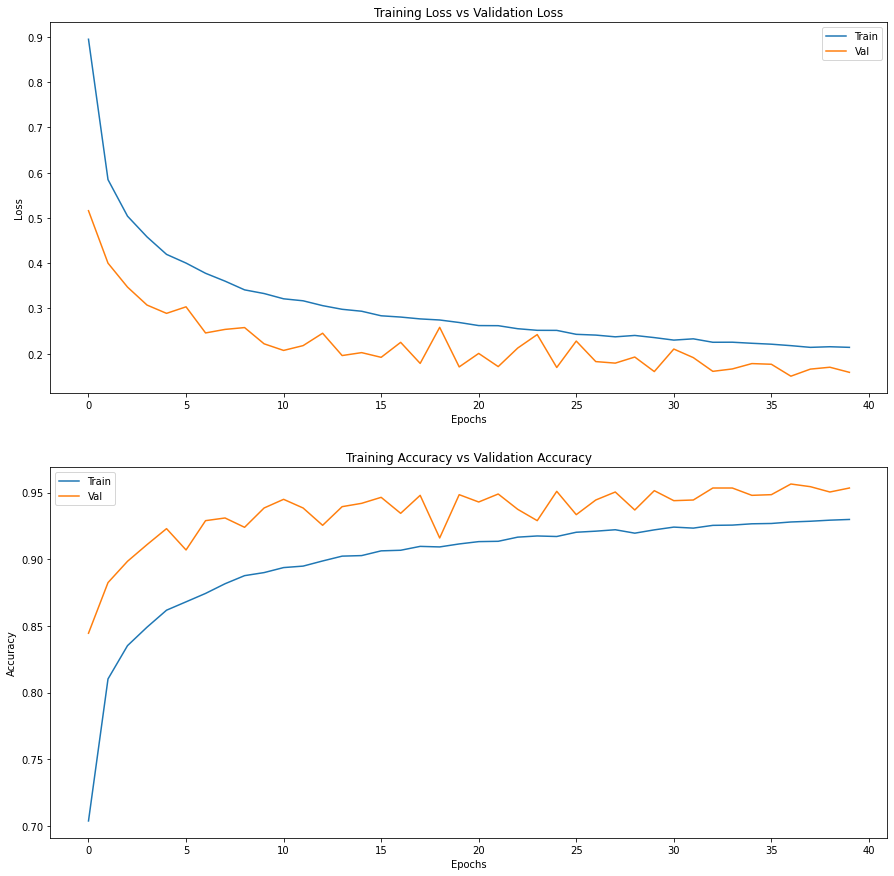

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.2160 - accuracy: 0.9319


[0.21603818237781525, 0.9319000244140625]